In [1]:
import pandas as pd 
import copy, math
import numpy as np 
import matplotlib.pyplot as plt 
dataset = pd.read_csv("Housing.csv")



In [2]:
x=dataset.price
y=dataset.area
x=np.array(x)
y=np.array(y)
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y=(y - np.min(y)) / (np.max(y) - np.min(y))



In [3]:
def cost( x, y,w,b):
        size = len(x)
        total = 0
        for i in range(size):
            y_pred = w * x[i] + b
            value_cost = (y_pred - y[i]) ** 2
            total += value_cost
        total_sum = (1 / (2 * size)) * total
        return total_sum
        

In [6]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

    

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing



In [10]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x, y, w_init, b_init, tmp_alpha, 
                                                    iterations, cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")



Iteration    0: Cost 3.94e-02  dj_dw: -7.576e-02, dj_db: -2.406e-01   w:  7.576e-04, b: 2.40587e-03
Iteration 1000: Cost 9.42e-03  dj_dw: -8.291e-03, dj_db:  2.214e-03   w:  1.549e-01, b: 2.02336e-01
Iteration 2000: Cost 8.83e-03  dj_dw: -6.490e-03, dj_db:  1.738e-03   w:  2.285e-01, b: 1.82656e-01
Iteration 3000: Cost 8.48e-03  dj_dw: -5.082e-03, dj_db:  1.361e-03   w:  2.860e-01, b: 1.67243e-01
Iteration 4000: Cost 8.26e-03  dj_dw: -3.979e-03, dj_db:  1.065e-03   w:  3.311e-01, b: 1.55176e-01
Iteration 5000: Cost 8.13e-03  dj_dw: -3.115e-03, dj_db:  8.340e-04   w:  3.664e-01, b: 1.45729e-01
Iteration 6000: Cost 8.04e-03  dj_dw: -2.439e-03, dj_db:  6.530e-04   w:  3.940e-01, b: 1.38331e-01
Iteration 7000: Cost 7.99e-03  dj_dw: -1.909e-03, dj_db:  5.112e-04   w:  4.156e-01, b: 1.32540e-01
Iteration 8000: Cost 7.96e-03  dj_dw: -1.495e-03, dj_db:  4.003e-04   w:  4.326e-01, b: 1.28005e-01
Iteration 9000: Cost 7.94e-03  dj_dw: -1.171e-03, dj_db:  3.134e-04   w:  4.458e-01, b: 1.24455e-01


Iteration    0: Cost 3.94e-02  dj_dw: -7.576e-02, dj_db: -2.406e-01   w:  7.576e-04, b: 2.40587e-03
Iteration 1000: Cost 9.42e-03  dj_dw: -8.291e-03, dj_db:  2.214e-03   w:  1.549e-01, b: 2.02336e-01
Iteration 2000: Cost 8.83e-03  dj_dw: -6.490e-03, dj_db:  1.738e-03   w:  2.285e-01, b: 1.82656e-01
Iteration 3000: Cost 8.48e-03  dj_dw: -5.082e-03, dj_db:  1.361e-03   w:  2.860e-01, b: 1.67243e-01
Iteration 4000: Cost 8.26e-03  dj_dw: -3.979e-03, dj_db:  1.065e-03   w:  3.311e-01, b: 1.55176e-01
Iteration 5000: Cost 8.13e-03  dj_dw: -3.115e-03, dj_db:  8.340e-04   w:  3.664e-01, b: 1.45729e-01
Iteration 6000: Cost 8.04e-03  dj_dw: -2.439e-03, dj_db:  6.530e-04   w:  3.940e-01, b: 1.38331e-01
Iteration 7000: Cost 7.99e-03  dj_dw: -1.909e-03, dj_db:  5.112e-04   w:  4.156e-01, b: 1.32540e-01
Iteration 8000: Cost 7.96e-03  dj_dw: -1.495e-03, dj_db:  4.003e-04   w:  4.326e-01, b: 1.28005e-01
Iteration 9000: Cost 7.94e-03  dj_dw: -1.171e-03, dj_db:  3.134e-04   w:  4.458e-01, b: 1.24455e-01


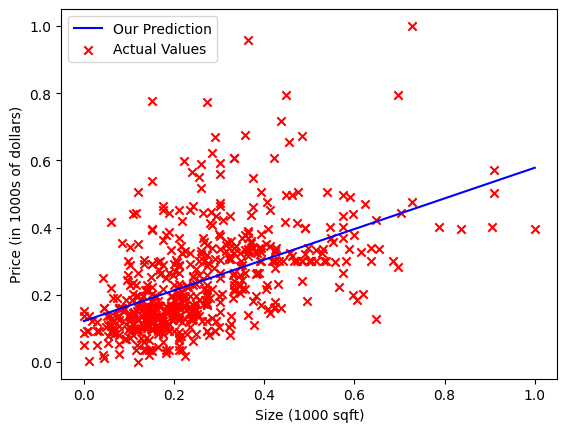

In [11]:
class LinearModel:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def predict(self, x):
        output = np.zeros_like(x)
        for i in range(len(x)):
            output[i] = self.w * x[i] + self.b
        return output

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x, y, w_init, b_init, tmp_alpha, 
                                                    iterations, cost, compute_gradient)
#print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")
model = LinearModel(w=w_final, b=b_final)

# Use the model to make predictions
output = model.predict(x)

# Plotting
plt.plot(x, output, c='b', label='Our Prediction')
plt.scatter(x, y, marker='x', c='r', label='Actual Values')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()